<a href="https://www.kaggle.com/code/violetmakena/what-makes-a-youtube-video-go-viral?scriptVersionId=249197470" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The DATA

In [3]:
# Some imports to get us started
import pandas as pd #working and manupulating datasets
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [4]:
import seaborn as sns
#visualisations
from scipy.stats import norm
#normalisation of the data
from sklearn.preprocessing import StandardScaler
#standardize data
from scipy import stats
#statistical insights
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-data-for-analytics-600-rows/youtube_data.csv


In [5]:
yt_data = pd.read_csv('/kaggle/input/youtube-data-for-analytics-600-rows/youtube_data.csv')

In [6]:
yt_data.head (3)

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg


In [7]:
yt_data.describe()

,category_id,view_count,like_count,comment_count
count,600.000000,6.000000e+02,6.000000e+02,600.000000
mean,24.903333,8.080299e+06,2.174646e+05,1970.144781
std,4.863477,2.455377e+07,5.074207e+05,4421.455908
min,1.000000,3.120000e+02,0.000000e+00,0.000000
25%,22.000000,8.150100e+04,1.646000e+03,13.000000
50%,27.000000,9.587180e+05,2.214900e+04,252.500000
75%,28.000000,5.991357e+06,2.174646e+05,1802.500000
max,30.000000,3.437590e+08,4.421091e+06,40241.000000


In [8]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        600 non-null    object 
 1   title           600 non-null    object 
 2   description     600 non-null    object 
 3   published_date  600 non-null    object 
 4   channel_id      600 non-null    object 
 5   channel_title   600 non-null    object 
 6   tags            600 non-null    object 
 7   category_id     600 non-null    int64  
 8   view_count      600 non-null    float64
 9   like_count      600 non-null    float64
 10  comment_count   600 non-null    float64
 11  duration        600 non-null    object 
 12  thumbnail       600 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 61.1+ KB


In [9]:
#looking for the number of unique values in the train dataframe
for col in yt_data.columns:
    print(col, len(yt_data[col].unique()))

video_id 581
title 573
description 439
published_date 582
channel_id 409
channel_title 408
tags 328
category_id 16
view_count 581
like_count 524
comment_count 395
duration 230
thumbnail 582


In [10]:
# Display the minimum and maximum date for 'View Count'
view_count_min = yt_data['view_count'].min()
view_count_max = yt_data['view_count'].max()

# Display the minimum and maximum date for 'Like Count'
like_count_min = yt_data['like_count'].min()
like_count_max = yt_data['like_count'].max()

# Print both ranges
print(f"View Count Range: {view_count_min} to {view_count_max}")
print(f"Like Count Range: {like_count_min} to {like_count_max}")

View Count Range: 312.0 to 343758991.0
Like Count Range: 0.0 to 4421091.0


## View and like count 

View Count Range: 312.0 to 343758991.0  Like Count Range: 0.0 to 4421091.0

# WHICH?

# Which Category has the highest view count and likes 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

# Set Thai-compatible font globally (update path to your system's font)
plt.rcParams['font.family'] = 'Noto Sans Thai'  # or 'TH Sarabun', 'Tahoma', etc.


# List of columns for count plots
columns_to_countplot = ['category_id', 'duration']

# Set up the plot grid
num_plots = len(columns_to_countplot)
num_cols = 2  # Number of columns in the plot grid
num_rows = (num_plots + 1) // num_cols

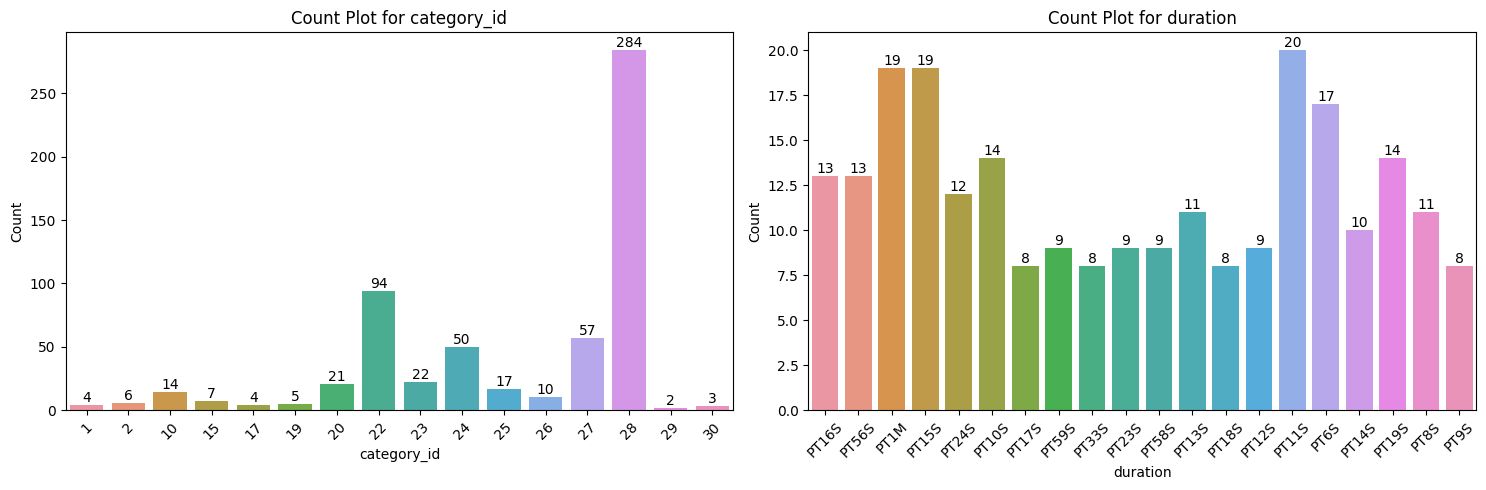

In [12]:
# Set figure size
plt.figure(figsize=(15, 5 * num_rows))

# Loop through the columns and create count plots
for i, col in enumerate(columns_to_countplot, 1):
    ax = plt.subplot(num_rows, num_cols, i)
    
    # Optional: limit unique values to avoid clutter
    top_values = yt_data[col].value_counts().nlargest(20).index
    filtered_data = yt_data[yt_data[col].isin(top_values)]
    
    sns.countplot(data=filtered_data, x=col, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability
    
    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

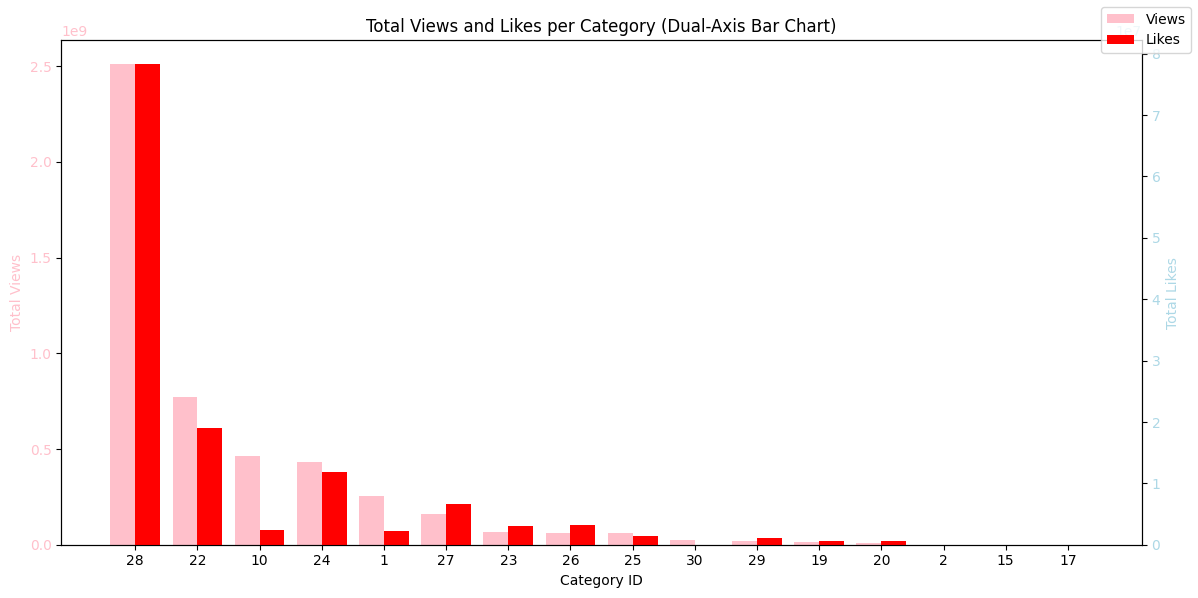

In [13]:
# Group the data by category_id and calculate total views and likes
category_stats = yt_data.groupby('category_id')[['view_count', 'like_count']].sum()

# Sort by total views for better readability
category_stats = category_stats.sort_values('view_count', ascending=False)

# Reset index
category_stats = category_stats.reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width and positions
bar_width = 0.4
x = range(len(category_stats))

# First bar: view_count on ax1
bars1 = ax1.bar(x, category_stats['view_count'], width=bar_width, label='Views', color='pink')
ax1.set_ylabel('Total Views', color='pink')
ax1.tick_params(axis='y', labelcolor='pink')

# Twin axis for like_count
ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in x], category_stats['like_count'], width=bar_width, label='Likes', color='red')
ax2.set_ylabel('Total Likes', color='lightblue')
ax2.tick_params(axis='y', labelcolor='lightblue')

# X-axis labels
plt.xticks([i + bar_width / 2 for i in x], category_stats['category_id'], rotation=45)
ax1.set_xlabel('Category ID')
plt.title('Total Views and Likes per Category (Dual-Axis Bar Chart)')

#legends
fig.legend([bars1, bars2], ['Views', 'Likes'], loc='upper right')

plt.tight_layout()
plt.show()


In [14]:
# Filter for category_id 28
cat_28_data = yt_data[yt_data['category_id'] == 28]

# Group by c# hannel_title and sum numeric metrics
channel_sums = cat_28_data.groupby('channel_title')[['view_count', 'like_count', 'comment_count']].sum()

# Sort by view count (optional)
channel_sums = channel_sums.sort_values('view_count', ascending=False)

# Display the result
print(channel_sums)


                       view_count    like_count  comment_count
channel_title                                                 
Mrwhosetheboss        388746831.0  1.703128e+07       188314.0
Immersed              346946547.0  6.348165e+06         9311.0
Tech Master Shorts    304369631.0  1.175240e+07        69489.0
VMK Technical Power   196980251.0  5.661704e+06        11282.0
Techवाला              139303650.0  1.474630e+06        16759.0
...                           ...           ...            ...
Space and Technology       1030.0  1.900000e+01            0.0
Bernardo Tutoriales         960.0  1.900000e+01            0.0
JDAWGTV                     834.0  3.400000e+01            2.0
IoT Forge                   476.0  2.000000e+00            0.0
Pwt Tech                    312.0  2.174646e+05            0.0

[151 rows x 3 columns]


### Top YT category 28 based on view count
* Mrwhosetheboss        
* Immersed              
* Tech Master Shorts    
* VMK Technical Power  
* Techवाला       

TOP VIEWS

In [15]:
# Group by c# hannel_title and sum numeric metrics
all_channel_sums = yt_data.groupby(['channel_title', 'category_id'])[['view_count', 'like_count', 'comment_count']].sum()    
# Sort by view count (optional)
all_channel_sums = all_channel_sums.sort_values('view_count', ascending=False)
# Display the result
print(all_channel_sums)

                                 view_count    like_count  comment_count
channel_title      category_id                                          
Mrwhosetheboss     28           388746831.0  1.703128e+07       188314.0
Immersed           28           346946547.0  6.348165e+06         9311.0
50CentVEVO         10           343758991.0  1.734503e+06        40241.0
Tech Master Shorts 28           304369631.0  1.175240e+07        69489.0
VFX HD             1            250097330.0  2.193684e+06         1293.0
...                                     ...           ...            ...
Andre Lug          27                 866.0  1.600000e+01            0.0
JDAWGTV            28                 834.0  3.400000e+01            2.0
Nice Channel       20                 616.0  7.000000e+00            1.0
IoT Forge          28                 476.0  2.000000e+00            0.0
Pwt Tech           28                 312.0  2.174646e+05            0.0

[411 rows x 3 columns]


TOP LIKES

In [16]:
# Group by channel_title and sum numeric metrics
all_channel_sums = yt_data.groupby(['channel_title', 'category_id'])[['view_count', 'like_count', 'comment_count']].sum()    
# Sort by view count (optional)
all_channel_sums = all_channel_sums.sort_values('like_count', ascending=False)
# Display the result
print(all_channel_sums)

                                  view_count  like_count  comment_count
channel_title       category_id                                        
Mrwhosetheboss      28           388746831.0  17031281.0       188314.0
Tech Master Shorts  28           304369631.0  11752404.0        69489.0
Immersed            28           346946547.0   6348165.0         9311.0
VMK Technical Power 28           196980251.0   5661704.0        11282.0
Salem Techsperts    28           109042762.0   5617046.0        36684.0
...                                      ...         ...            ...
Dyo Facts           27                1539.0         9.0            0.0
Nice Channel        20                 616.0         7.0            1.0
 Tech Gp Govind     28                1701.0         6.0            0.0
INANIYA EDUCATION   27                1039.0         3.0            0.0
IoT Forge           28                 476.0         2.0            0.0

[411 rows x 3 columns]


# Time-series forecasting of views/likes/comments.
## Investigating whether time and date of video posted influences the views and likes

In [17]:
yt_data['published_date']

0      2025-05-02T17:37:10Z
1      2025-06-18T12:39:53Z
2      2022-11-01T11:00:06Z
3      2024-07-08T18:04:31Z
4      2024-12-22T16:49:00Z
               ...         
595    2022-05-03T22:23:10Z
596    2025-06-20T05:15:19Z
597    2025-06-19T13:39:44Z
598    2025-06-20T02:00:02Z
599    2025-06-19T15:16:47Z
Name: published_date, Length: 600, dtype: object

In [18]:
# Make sure 'published_date' is in datetime format
yt_data['published_date'] = pd.to_datetime(yt_data['published_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Extract components
yt_data['published_hour'] = yt_data['published_date'].dt.hour
yt_data['published_day'] = yt_data['published_date'].dt.date
yt_data['published_month'] = yt_data['published_date'].dt.month
yt_data['published_weekday'] = yt_data['published_date'].dt.day_name()


In [19]:
yt_data.head(5)

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail,published_hour,published_day,published_month,published_weekday
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02 17:37:10,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg,17,2025-05-02,5,Friday
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18 12:39:53,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,12,2025-06-18,6,Wednesday
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01 11:00:06,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,11,2022-11-01,11,Tuesday
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08 18:04:31,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,18,2024-07-08,7,Monday
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22 16:49:00,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16,2024-12-22,12,Sunday


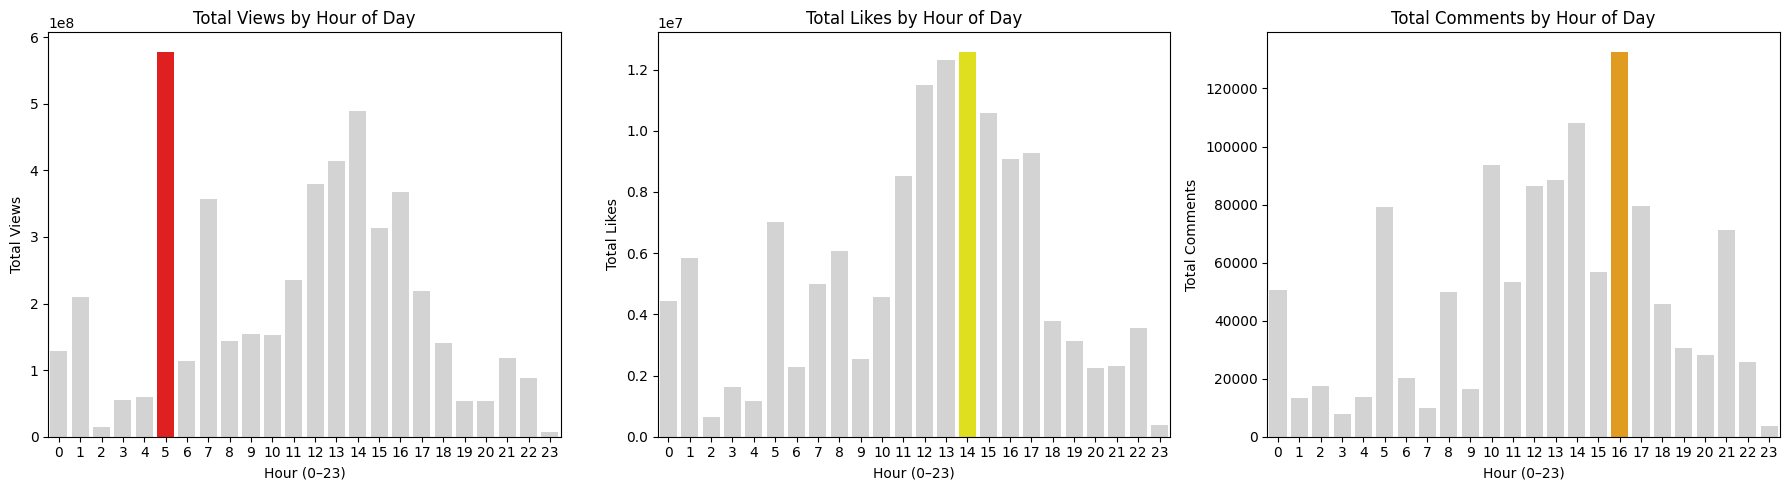

In [20]:
hourly_views = yt_data.groupby('published_hour')['view_count'].sum().sort_index()
hourly_likes = yt_data.groupby('published_hour')['like_count'].sum().sort_index()
hourly_comments = yt_data.groupby('published_hour')['comment_count'].sum().sort_index()

# Colors for views (blue highlight max)
highlight_color_views = 'red'
default_color_views = 'lightgrey'
colors_views = [highlight_color_views if val == hourly_views.max() else default_color_views for val in hourly_views.values]

# Colors for likes (yellow highlight max)
highlight_color_likes = 'yellow'
default_color_likes = 'lightgrey'
colors_likes = [highlight_color_likes if val == hourly_likes.max() else default_color_likes for val in hourly_likes.values]

# Colors for comments (orange highlight max)
highlight_color_comments = 'orange'
default_color_comments = 'lightgrey'
colors_comments = [highlight_color_comments if val == hourly_comments.max() else default_color_comments for val in hourly_comments.values]

# Corrected subplot layout: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Plot views
sns.barplot(x=hourly_views.index, y=hourly_views.values, palette=colors_views, ax=axes[0])
axes[0].set_title('Total Views by Hour of Day')
axes[0].set_xlabel('Hour (0–23)')
axes[0].set_ylabel('Total Views')

# Plot likes
sns.barplot(x=hourly_likes.index, y=hourly_likes.values, palette=colors_likes, ax=axes[1])
axes[1].set_title('Total Likes by Hour of Day')
axes[1].set_xlabel('Hour (0–23)')
axes[1].set_ylabel('Total Likes')

# Plot comments
sns.barplot(x=hourly_comments.index, y=hourly_comments.values, palette=colors_comments, ax=axes[2])
axes[2].set_title('Total Comments by Hour of Day')
axes[2].set_xlabel('Hour (0–23)')
axes[2].set_ylabel('Total Comments')

plt.tight_layout()
plt.show()


Key Insight:
Hour 5 (5 AM) is the most effective upload time in terms of accumulated views. This might indicate:

Global scheduling behavior (e.g., aligning with certain time zones).

Algorithmic preference or content targeting audiences who are online early.

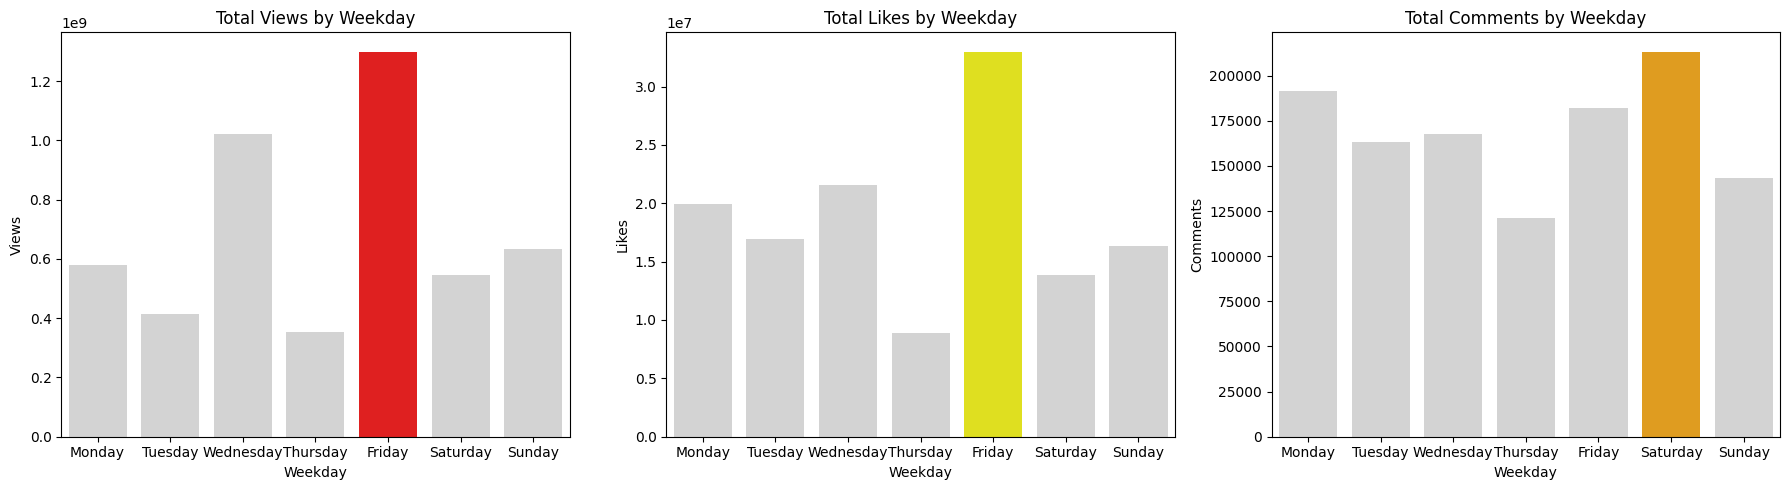

In [21]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate metrics
weekday_views = yt_data.groupby('published_weekday')['view_count'].sum().reindex(weekday_order)
weekday_likes = yt_data.groupby('published_weekday')['like_count'].sum().reindex(weekday_order)
weekday_comments = yt_data.groupby('published_weekday')['comment_count'].sum().reindex(weekday_order)

# Colors for views
highlight_color_views = 'red'
default_color_views = 'lightgrey'
colors_views = [highlight_color_views if val == weekday_views.max() else default_color_views for val in weekday_views.values]

# Colors for likes
highlight_color_likes = 'yellow'
default_color_likes = 'lightgrey'
colors_likes = [highlight_color_likes if val == weekday_likes.max() else default_color_likes for val in weekday_likes.values]

# Colors for comments
highlight_color_comments = 'orange'
default_color_comments = 'lightgrey'
colors_comments = [highlight_color_comments if val == weekday_comments.max() else default_color_comments for val in weekday_comments.values]

# Create 1-row, 3-column grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False)

# Views
sns.barplot(x=weekday_views.index, y=weekday_views.values, palette=colors_views, ax=axes[0])
axes[0].set_title('Total Views by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Views')

# Likes
sns.barplot(x=weekday_likes.index, y=weekday_likes.values, palette=colors_likes, ax=axes[1])
axes[1].set_title('Total Likes by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Likes')

# Comments
sns.barplot(x=weekday_comments.index, y=weekday_comments.values, palette=colors_comments, ax=axes[2])
axes[2].set_title('Total Comments by Weekday')
axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Comments')

plt.tight_layout()
plt.show()


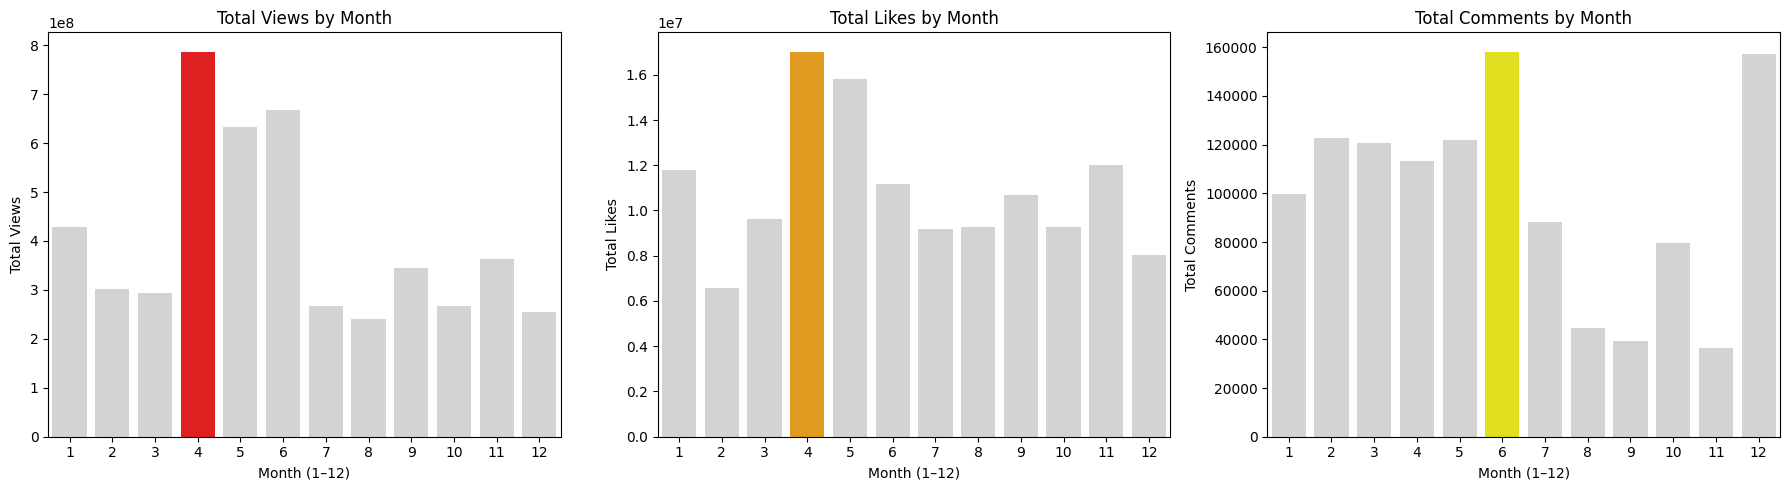

In [22]:
# Grouping by month
monthly_views = yt_data.groupby('published_month')['view_count'].sum().sort_index()
monthly_likes = yt_data.groupby('published_month')['like_count'].sum().sort_index()
monthly_comments = yt_data.groupby('published_month')['comment_count'].sum().sort_index()

# Colors for views (green highlight)
highlight_color_views = 'red'
default_color_views = 'lightgrey'
colors_views = [highlight_color_views if val == monthly_views.max() else default_color_views for val in monthly_views.values]

# Colors for likes (red highlight)
highlight_color_likes = 'orange'
default_color_likes = 'lightgrey'
colors_likes = [highlight_color_likes if val == monthly_likes.max() else default_color_likes for val in monthly_likes.values]

# Colors for comments (blue highlight)
highlight_color_comments = 'yellow'
default_color_comments = 'lightgrey'
colors_comments = [highlight_color_comments if val == monthly_comments.max() else default_color_comments for val in monthly_comments.values]

# Subplot grid: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Views
sns.barplot(x=monthly_views.index, y=monthly_views.values, palette=colors_views, ax=axes[0])
axes[0].set_title('Total Views by Month')
axes[0].set_xlabel('Month (1–12)')
axes[0].set_ylabel('Total Views')

# Likes
sns.barplot(x=monthly_likes.index, y=monthly_likes.values, palette=colors_likes, ax=axes[1])
axes[1].set_title('Total Likes by Month')
axes[1].set_xlabel('Month (1–12)')
axes[1].set_ylabel('Total Likes')

# Comments
sns.barplot(x=monthly_comments.index, y=monthly_comments.values, palette=colors_comments, ax=axes[2])
axes[2].set_title('Total Comments by Month')
axes[2].set_xlabel('Month (1–12)')
axes[2].set_ylabel('Total Comments')

plt.tight_layout()
plt.show()


In [23]:
yt_data.head(5)

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail,published_hour,published_day,published_month,published_weekday
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02 17:37:10,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg,17,2025-05-02,5,Friday
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18 12:39:53,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,12,2025-06-18,6,Wednesday
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01 11:00:06,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,11,2022-11-01,11,Tuesday
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08 18:04:31,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,18,2024-07-08,7,Monday
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22 16:49:00,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16,2024-12-22,12,Sunday


# Plotting View Count Trend Over Time by Category:

### Updating Your Dashboard to Use Only Valid Columns  

In [24]:
# Ensure datetime is clean
yt_data['published_date'] = pd.to_datetime(yt_data['published_date'], errors='coerce')

# Dropping rows with missing 'published_date' or 'view_count'
yt_clean = yt_data.dropna(subset=['published_date', 'view_count'])

# Extract year
yt_clean['published_year'] = yt_clean['published_date'].dt.year

# Grouping by available years
yearly_data = yt_clean.groupby('published_year')[['view_count', 'like_count', 'comment_count']].sum(min_count=1).sort_index()


### Safe Plotting – Avoid Errors from Missing Columns

In [25]:
yt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           600 non-null    object        
 1   title              600 non-null    object        
 2   description        600 non-null    object        
 3   published_date     600 non-null    datetime64[ns]
 4   channel_id         600 non-null    object        
 5   channel_title      600 non-null    object        
 6   tags               600 non-null    object        
 7   category_id        600 non-null    int64         
 8   view_count         600 non-null    float64       
 9   like_count         600 non-null    float64       
 10  comment_count      600 non-null    float64       
 11  duration           600 non-null    object        
 12  thumbnail          600 non-null    object        
 13  published_hour     600 non-null    int32         
 14  published_

In [26]:
from matplotlib.ticker import MaxNLocator

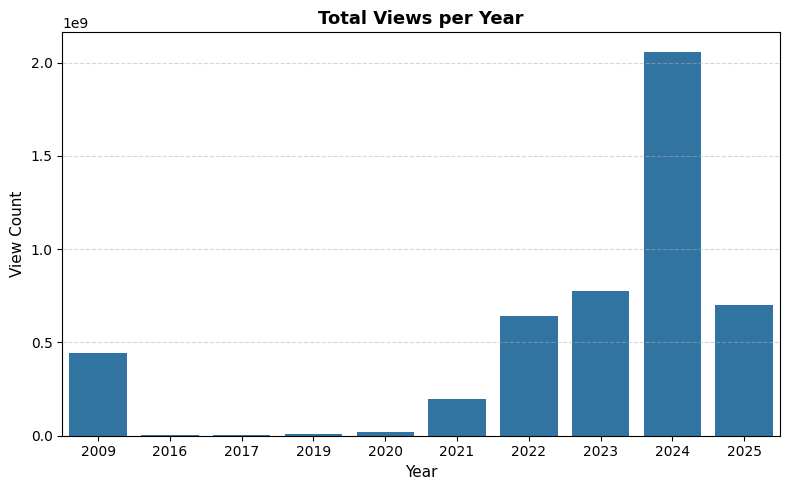

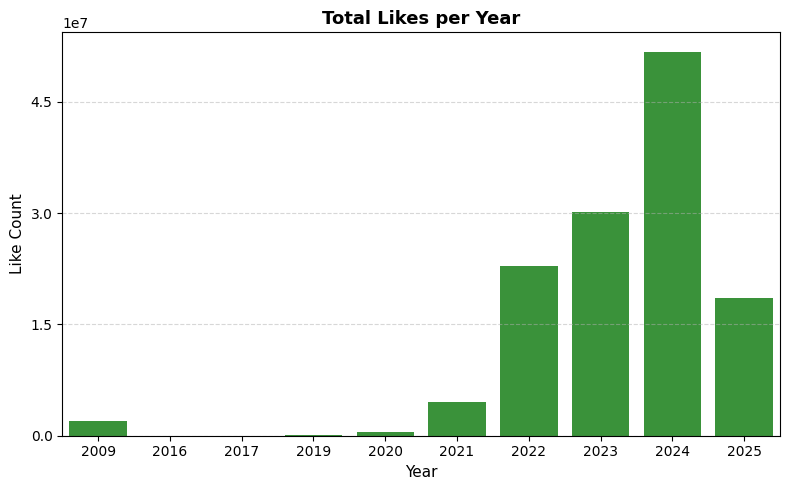

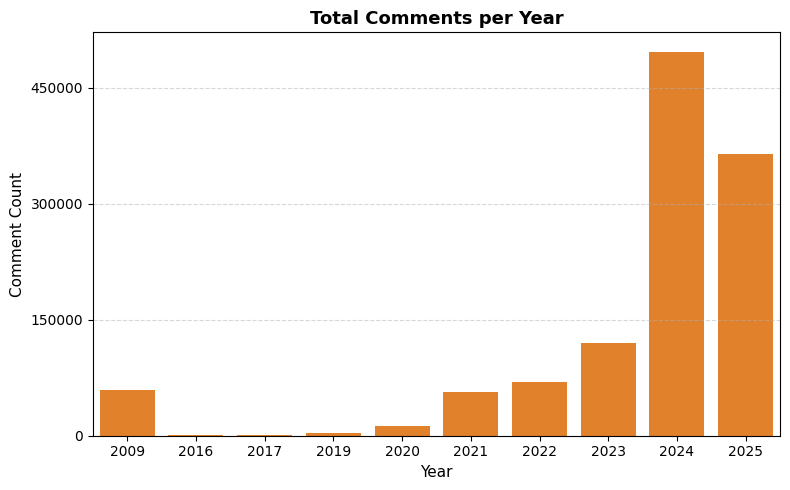

In [27]:
# Define the metrics you care about
metrics = ['view_count', 'like_count', 'comment_count']

# Define custom colors for each metric
colors = {
    'view_count': '#1f77b4',     # Blue
    'like_count': '#2ca02c',     # Green
    'comment_count': '#ff7f0e'   # Orange
}

# Define custom titles for each metric
titles = {
    'view_count': 'Total Views per Year',
    'like_count': 'Total Likes per Year',
    'comment_count': 'Total Comments per Year'
}

# Ensure only columns that exist and have enough data are used
available_metrics = [col for col in metrics if col in yt_clean.columns and yt_clean[col].notna().sum() > 100]

# Loop through each available metric and plot
for metric in available_metrics:
    fig, ax = plt.subplots(figsize=(8, 5))

    sns.barplot(
        x=yearly_data.index,
        y=yearly_data[metric],
        color=colors.get(metric, 'grey'),  # Use defined color or fallback to grey
        ax=ax
    )

    ax.set_title(titles.get(metric, metric.replace('_', ' ').title()), fontsize=13, weight='bold')
    ax.set_xlabel("Year", fontsize=11)
    ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # Annotate peak value
    if yearly_data[metric].notna().sum() > 1:
        peak_year = yearly_data[metric].idxmax()
        peak_value = yearly_data[metric].max()
        ax.annotate(
            f'{int(peak_value):,}',
            xy=(peak_year, peak_value),
            xytext=(peak_year, peak_value * 1.05),
            ha='center',
            fontsize=9,
            color='black',
            arrowprops=dict(arrowstyle='->', color='black')
        )

    plt.tight_layout()
    plt.show()


# Overall Observations:
* 2024 was your channel’s strongest year for all three metrics: views, likes, and comments.
* There's a clear growth trend from 2021 to 2024, suggesting improved content strategy, more frequent uploads, or viral videos.
* 2025 shows a dip, which may indicate fewer uploads, lower-performing videos, or a shift in content engagement.

###   Normalize Per Upload

In [28]:
# Count how many videos were uploaded each year
upload_counts = yt_clean.groupby('published_year').size()

#Averages per video 
# sums up the total view_count, like_count, and comment_count across all videos.
yearly_sums = yt_clean.groupby('published_year')[['view_count', 'like_count', 'comment_count']].sum()

# Instead of summing values, it counts how many videos (rows) were uploaded in each year
upload_counts = yt_clean.groupby('published_year').size()

# Normalize (average per video) Divides each value in yearly_sums by the corresponding value in upload_counts (i.e., total / number of uploads).
avg_per_video = yearly_sums.div(upload_counts, axis=0)


In [29]:
avg_per_video

,view_count,like_count,comment_count
published_year,,,
2009,1.474350e+08,683673.333333,19562.666667
2016,2.149006e+06,23771.000000,583.000000
2017,1.494602e+06,8306.000000,409.000000
2019,2.545626e+06,34840.666667,1041.666667
2020,6.186762e+06,156675.333333,4198.666667
2021,1.970762e+07,454187.460838,5693.100000
2022,2.561864e+07,913238.480000,2784.560000
2023,2.042449e+07,793597.847809,3138.898547
2024,1.271623e+07,319607.731847,3065.642869


In [30]:
upload_counts 

published_year
2009      3
2016      1
2017      1
2019      3
2020      3
2021     10
2022     25
2023     38
2024    162
2025    354
dtype: int64

In [31]:
yearly_sums

,view_count,like_count,comment_count
published_year,,,
2009,4.423050e+08,2.051020e+06,58688.000000
2016,2.149006e+06,2.377100e+04,583.000000
2017,1.494602e+06,8.306000e+03,409.000000
2019,7.636877e+06,1.045220e+05,3125.000000
2020,1.856029e+07,4.700260e+05,12596.000000
2021,1.970762e+08,4.541875e+06,56931.000000
2022,6.404659e+08,2.283096e+07,69614.000000
2023,7.761306e+08,3.015672e+07,119278.144781
2024,2.060030e+09,5.177645e+07,496634.144781


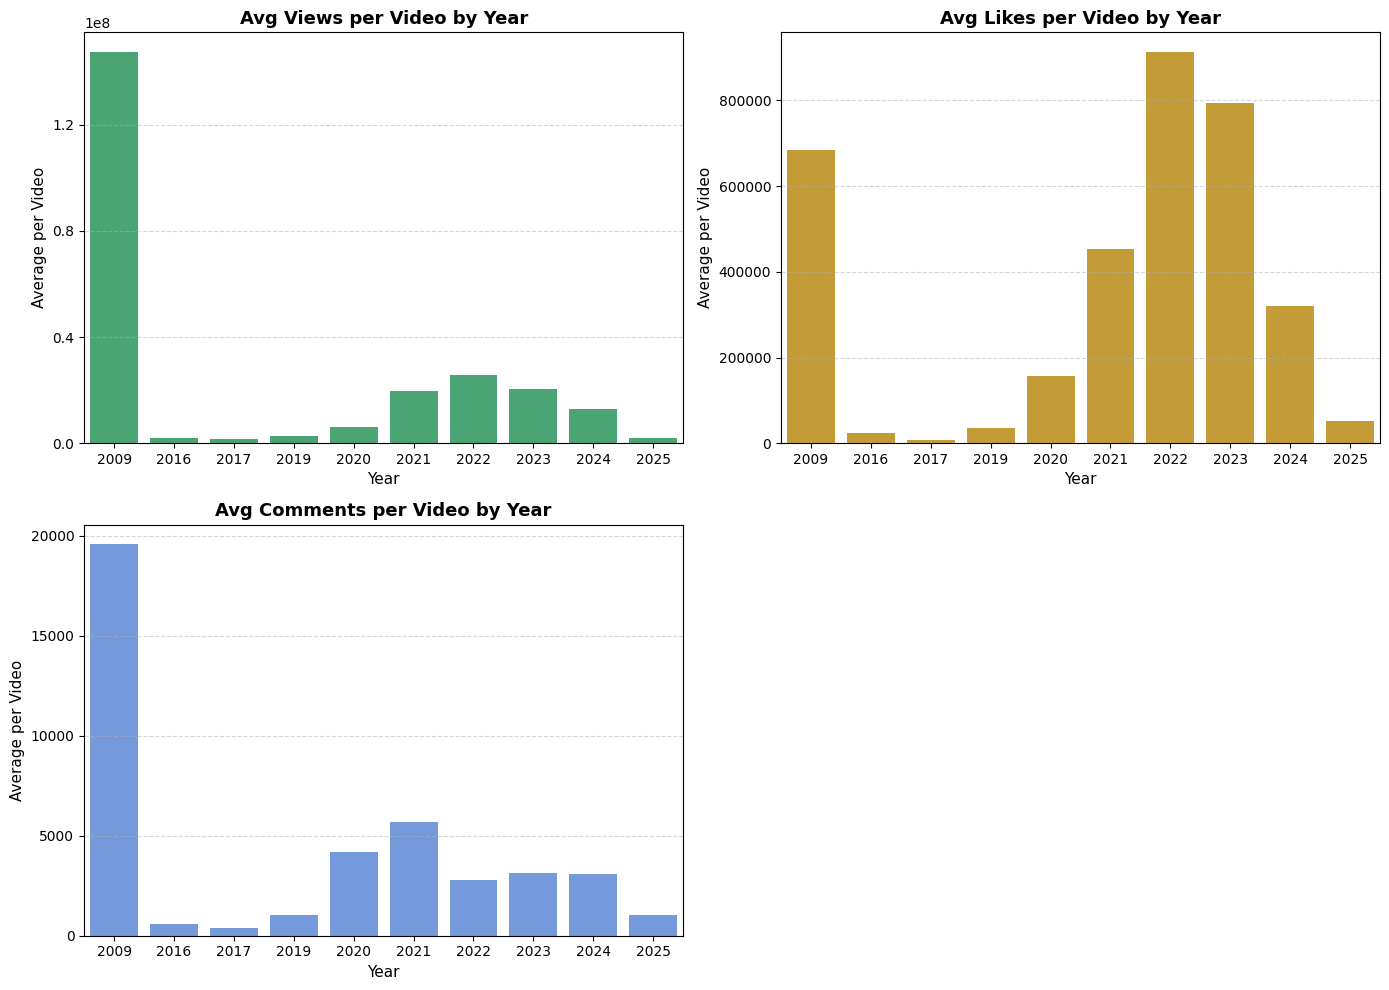

In [32]:
#Plotting 
# Titles and colors
titles = {
    'view_count': 'Avg Views per Video by Year',
    'like_count': 'Avg Likes per Video by Year',
    'comment_count': 'Avg Comments per Video by Year'
}
colors = {
    'view_count': 'mediumseagreen',
    'like_count': 'goldenrod',
    'comment_count': 'cornflowerblue'
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(['view_count', 'like_count', 'comment_count']):
    if metric in avg_per_video.columns and avg_per_video[metric].notna().sum() >= 2:
        sns.barplot(
            x=avg_per_video.index,
            y=avg_per_video[metric],
            ax=axes[i],
            color=colors[metric]
        )
        axes[i].set_title(titles[metric], fontsize=13, weight='bold')
        axes[i].set_xlabel("Year", fontsize=11)
        axes[i].set_ylabel("Average per Video", fontsize=11)
        axes[i].yaxis.set_major_locator(MaxNLocator(nbins=5))
        axes[i].grid(axis='y', linestyle='--', alpha=0.5)

        # Annotate peak
        peak_year = avg_per_video[metric].idxmax()
        peak_value = avg_per_video[metric].max()
        axes[i].annotate(
            f'{int(peak_value):,}',
            xy=(peak_year, peak_value),
            xytext=(peak_year, peak_value * 1.05),
            ha='center',
            fontsize=9,
            color='black',
            arrowprops=dict(arrowstyle='->', color='black')
        )
    else:
        axes[i].axis('off')

# Hide unused subplot if any
axes[3].axis('off')

plt.tight_layout()
plt.show()

The chart above shows 
Which year gave you the most views per upload which is the most effective year.
Whether volume = success or whether strategy = results.
Highlights years where fewer videos performed best.

# Key Trends
Growth in Total Upload Impact
* There’s explosive growth in total views and engagement, especially:
* 2022–2024: strong upward trend in all metrics.
* 2024 has the highest total views (2.06 billion), more than 3x 2023.

Drop in Per-Video Performance Despite Growth
From the earlier avg_per_video data:
In 2024, although total views are huge, the average views per video dropped to 12.7M (from 25.6M in 2022 and 20.4M in 2023).

In 2025, it dropped further to just 1.98M per video, despite uploading 354 videos!

This shows diminishing returns — more uploads but less impact per video.

# What does this mean for Startegy
2022:
High impact per video with low volume: Possibly the sweet spot — content resonated well with the audience.

**2024–2025:**
Volume skyrocketed, but quality/engagement seems diluted.

**Possible reasons:**

* Less engaging content.
* Shorter videos or less compelling titles/thumbnails.
* Algorithm shift.
* Uploading too frequently with little promotion.

# **Recommendations** 
* Audit 2022 videos: What made them so successful? Replicate that strategy.
* Reduce quantity, focus on quality: 2025 uploads are very high, but effectiveness is low.
* Improve titles, thumbnails, hooks: Test and optimize click-through and retention.
* Cnsider upload pacing: Fewer, more targeted uploads may perform better.
* Boost 2025 videos with SEO, paid ads, or re-edits if they underperformed but had potential.

# Summary Data

## Deeper statistical summary
YOY growth & CAGR


#### YoY Growth Year-over Year Growth

Formula:

YoY Growth = [(Value current − Value previous)/Value previous]x100


In [33]:
# Calculate Year-over-Year growth for each metric
yoy_growth = yearly_sums.pct_change() * 100  # pct_change() is called on the DataFrame

# Round to 2 decimal places for readability
yoy_growth = yoy_growth.round(2)

# Rename columns to indicate growth
yoy_growth.columns = [f"{col} YoY Growth (%)" for col in yoy_growth.columns]

# Show the result
print(yoy_growth)

                view_count YoY Growth (%)  like_count YoY Growth (%)  \
published_year                                                         
2009                                  NaN                        NaN   
2016                               -99.51                     -98.84   
2017                               -30.45                     -65.06   
2019                               410.96                    1158.39   
2020                               143.04                     349.69   
2021                               961.82                     866.30   
2022                               224.98                     402.68   
2023                                21.18                      32.09   
2024                               165.42                      71.69   
2025                               -65.91                     -64.24   

                comment_count YoY Growth (%)  
published_year                                
2009                                     

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/tmp/ipykernel_35/827452160.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


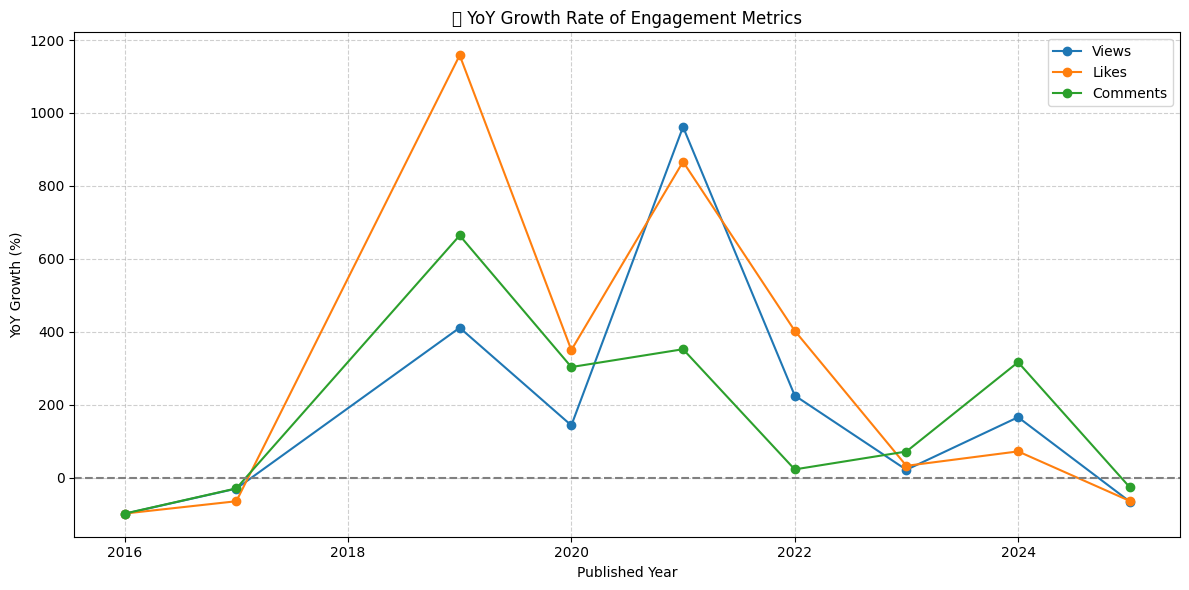

In [34]:
# Plot all 3 metrics on one chart
plt.figure(figsize=(12, 6))
plt.plot(yoy_growth.index, yoy_growth['view_count YoY Growth (%)'], label='Views', marker='o')
plt.plot(yoy_growth.index, yoy_growth['like_count YoY Growth (%)'], label='Likes', marker='o')
plt.plot(yoy_growth.index, yoy_growth['comment_count YoY Growth (%)'], label='Comments', marker='o')

plt.axhline(0, color='grey', linestyle='--')
plt.title("📈 YoY Growth Rate of Engagement Metrics")
plt.xlabel("Published Year")
plt.ylabel("YoY Growth (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Insights:
* 2016–2017 were very low-activity years.
* 2019–2021 was your golden growth period (triple-digit YoY).
* 2022 marked a high, but 2023 slowed down.
* 2024 brought strong comment growth — maybe more engaging content?
* 2025 saw a steep crash 

**need to investigate**:
1. Was content different?
2. Were videos shorter or less promoted?
3. Were there YouTube algorithm changes?



###  CAGR (2009 to 2025) 
### CAGR (Compound Annual Growth Rate) to assess long-term trend
Formula:
CAGR = [(End Value/Start Value)^1/n - 1

In [35]:
def calculate_cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1

start_year = 2009
end_year = 2025
n_years = end_year - start_year  # 16 years

cagr_results = {}
for metric in yearly_sums.columns:
    start_val = yearly_sums.loc[start_year, metric]
    end_val = yearly_sums.loc[end_year, metric]
    cagr = calculate_cagr(start_val, end_val, n_years)
    cagr_results[metric] = round(cagr * 100, 2)  # convert to %

print("CAGR from 2009 to 2025 (%):")
for metric, rate in cagr_results.items():
    print(f"{metric}: {rate}%")


CAGR from 2009 to 2025 (%):
view_count: 2.93%
like_count: 14.74%
comment_count: 12.09%


View count growing slowly at ~2.9% per year over 16 years — a modest steady increase.
Likes and comments growing much faster (~15% and ~12%), showing engagement has ramped up faster than just views.
This could mean people interact more actively with your content over time even if total views grow gradually.

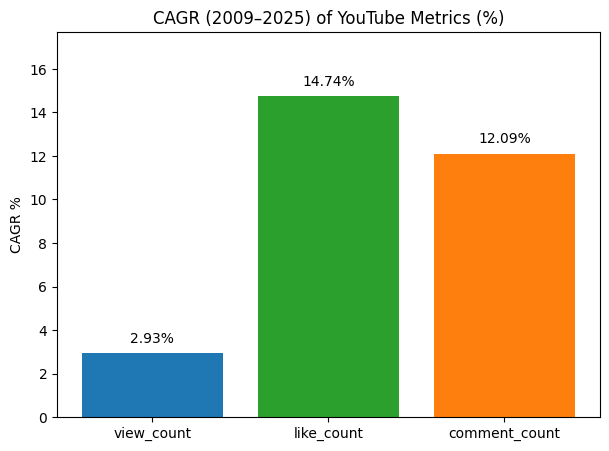

In [36]:
# CAGR results you provided
cagr_2009_2025 = {
    'view_count': 2.93,
    'like_count': 14.74,
    'comment_count': 12.09
}

plt.figure(figsize=(7,5))
plt.bar(cagr_2009_2025.keys(), cagr_2009_2025.values(), color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("CAGR (2009–2025) of YouTube Metrics (%)")
plt.ylabel("CAGR %")
plt.ylim(0, max(cagr_2009_2025.values()) * 1.2)
for i, v in enumerate(cagr_2009_2025.values()):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')
plt.show()


### Comparing CAGR for 2016–2025 before and After Covid-19

In [37]:
# Define function to calculate CAGR (reuse if needed)
def calculate_cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1

start_year_1 = 2009
start_year_2 = 2019
end_year = 2025

n_years_1 = end_year - start_year_1  # 16 years
n_years_2 = end_year - start_year_2  # 9 years

cagr_2016_2025 = {}
for metric in yearly_sums.columns:
    start_val = yearly_sums.loc[start_year_2, metric]
    end_val = yearly_sums.loc[end_year, metric]
    cagr = calculate_cagr(start_val, end_val, n_years_2)
    cagr_2016_2025[metric] = round(cagr * 100, 2)  # convert to %

# Combine both CAGR dictionaries for comparison
import pandas as pd

cagr_compare = pd.DataFrame({
    '2009-2025': cagr_2009_2025,
    '2019-2025': cagr_2016_2025
})

print(cagr_compare)


               2009-2025  2019-2025
view_count          2.93     112.46
like_count         14.74     136.98
comment_count      12.09     121.01


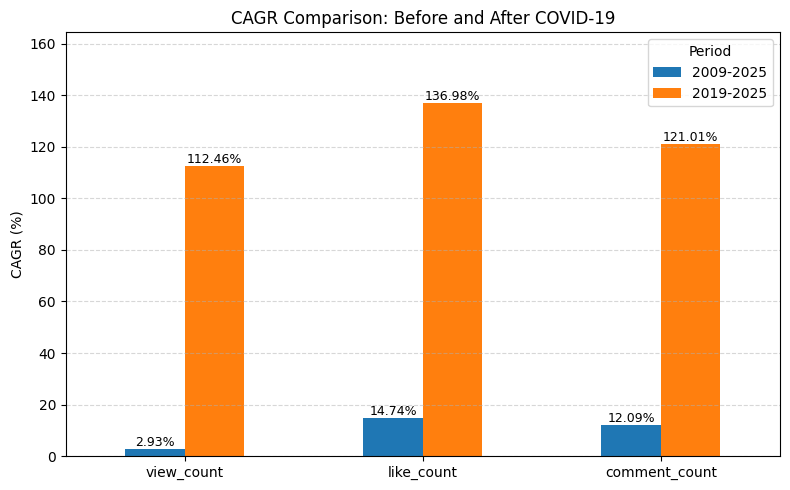

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Your CAGR data
cagr_data = {
    '2009-2025': {'view_count': 2.93, 'like_count': 14.74, 'comment_count': 12.09},
    '2019-2025': {'view_count': 112.46, 'like_count': 136.98, 'comment_count': 121.01}
}

# Convert to DataFrame
cagr_df = pd.DataFrame(cagr_data)

# Plot
ax = cagr_df.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])
plt.title('CAGR Comparison: Before and After COVID-19')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=0)
plt.ylim(0, cagr_df.values.max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Period')
plt.tight_layout()

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

plt.show()


Massive surge in growth since 2019 across all metrics.
Engagement exploded post-COVID, likely due to increased online content consumption.

The very high engagement numbers in 2009 like the huge average views per video are most likely caused by a small sample size and outliers:

In 2009, you had only 3 uploads (from your upload counts).
If even one video went viral or gained massive views/likes/comments, it would skew the averages and totals enormously.
This kind of data distortion happens often when early dataset years have very few entries.
What this means practically:
2009 numbers aren’t reliable for trend analysis because they don't represent a stable or mature dataset.
> 
This can exaggerate engagement metrics, making that year look like an outlier.

Between 2019 and 2024, your data shows massive CAGR jumps across views, likes, and comments, which fits perfectly with the COVID-19 pandemic timeline and its social impact:
* Lockdowns and social distancing meant people spent more time online, consuming and interacting with digital content.
* Platforms like YouTube saw surges in both content creation (uploads) and user engagement (views, likes, comments).
* This is why the post-2019 growth rates are dramatically higher than the longer-term average from 2009 onward.

# Trend analysis on content type vs. engagement.
### Engagement Trends by Channel or Content Type

In [39]:
yt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           600 non-null    object        
 1   title              600 non-null    object        
 2   description        600 non-null    object        
 3   published_date     600 non-null    datetime64[ns]
 4   channel_id         600 non-null    object        
 5   channel_title      600 non-null    object        
 6   tags               600 non-null    object        
 7   category_id        600 non-null    int64         
 8   view_count         600 non-null    float64       
 9   like_count         600 non-null    float64       
 10  comment_count      600 non-null    float64       
 11  duration           600 non-null    object        
 12  thumbnail          600 non-null    object        
 13  published_hour     600 non-null    int32         
 14  published_

In [40]:
channel_summary = yt_clean.groupby('category_id')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)
print(channel_summary.head(5))  # Top 5 channels by average views

               view_count     like_count  comment_count
category_id                                            
1            6.426066e+07  566955.500000    1733.250000
10           3.297006e+07  174705.757741    4436.428571
29           1.093886e+07  523560.000000    1755.500000
28           8.837065e+06  275554.387766    2434.736935
24           8.606462e+06  237128.496503    1776.182896


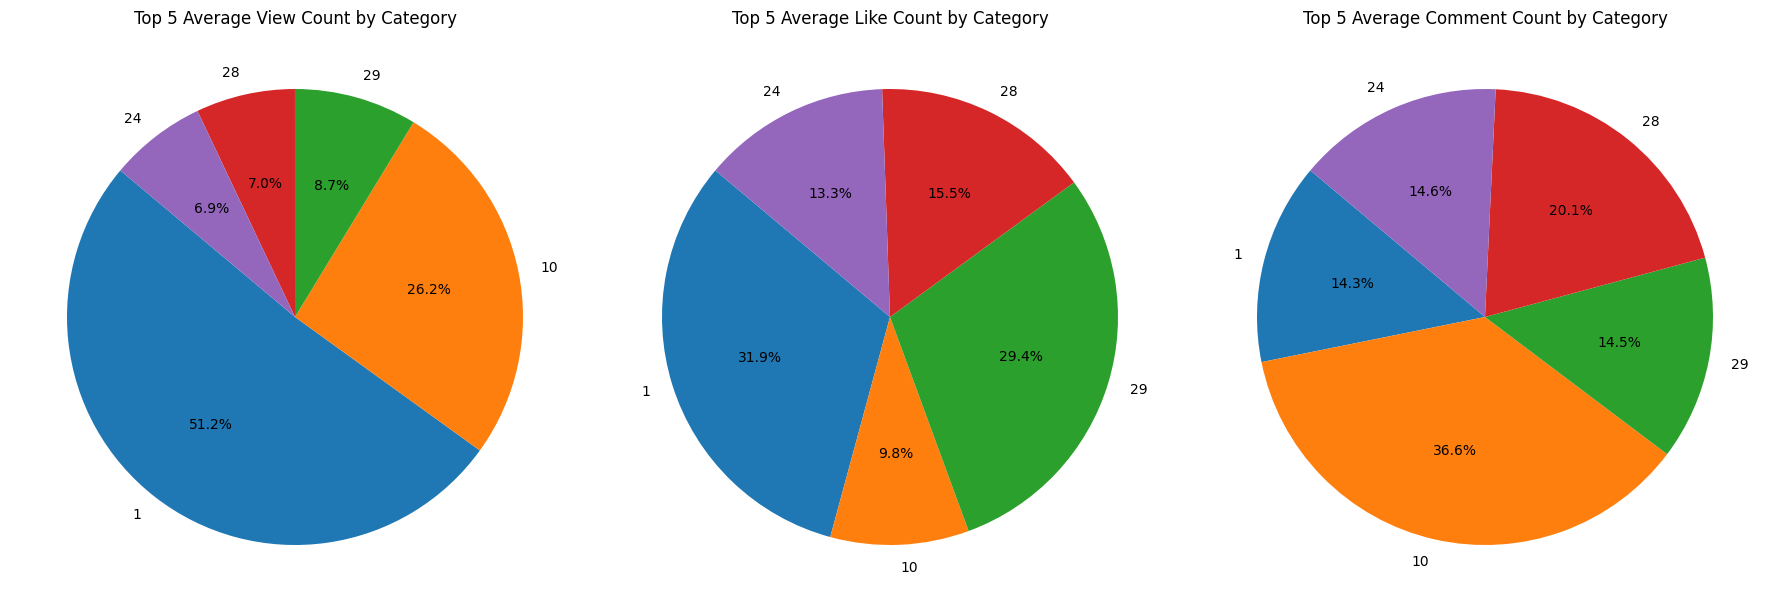

In [41]:
import matplotlib.pyplot as plt

# Select top 5 categories by view_count (already sorted)
top5 = channel_summary.head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for average view_count (top 5)
axes[0].pie(top5['view_count'], labels=top5.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top 5 Average View Count by Category')

# Pie chart for average like_count (top 5)
axes[1].pie(top5['like_count'], labels=top5.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Top 5 Average Like Count by Category')

# Pie chart for average comment_count (top 5)
axes[2].pie(top5['comment_count'], labels=top5.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Top 5 Average Comment Count by Category')

plt.tight_layout()
plt.show()

In [42]:
#average metrics in every category
avg_metrics = yt_clean.groupby('category_id')[['view_count', 'like_count', 'comment_count']].mean()

# top 5 for each metric
top_views = avg_metrics['view_count'].nlargest(5)
top_likes = avg_metrics['like_count'].nlargest(5)
top_comments = avg_metrics['comment_count'].nlargest(5)

# Combine top categories
top_categories = set(top_views.index) | set(top_likes.index) | set(top_comments.index)

# Step 3: Create a summary DataFrame
def interpret(value, metric):
    if metric == 'view_count':
        if value >= top_views.iloc[0]*0.9:
            return "Very high"
        elif value >= top_views.mean():
            return "High"
        elif value >= top_views.min():
            return "Moderate"
        else:
            return "Low"
    elif metric == 'like_count':
        if value >= top_likes.iloc[0]*0.9:
            return "High"
        elif value >= top_likes.mean():
            return "Medium"
        else:
            return "Low"
    elif metric == 'comment_count':
        if value >= top_comments.iloc[0]*0.9:
            return "Very high"
        elif value >= top_comments.mean():
            return "High"
        elif value >= top_comments.min():
            return "Medium"
        else:
            return "Low"

summary_rows = []
for cat_id in top_categories:
    row = {
        "Category ID": cat_id,
        "Views": interpret(avg_metrics.loc[cat_id, 'view_count'], 'view_count'),
        "Likes": interpret(avg_metrics.loc[cat_id, 'like_count'], 'like_count'),
        "Comments": interpret(avg_metrics.loc[cat_id, 'comment_count'], 'comment_count')
    }

    # Add a simple interpretation rule
    v = row['Views']
    l = row['Likes']
    c = row['Comments']
    if v == "Very high" and l in ["High", "Medium"] and c in ["Low", "Moderate"]:
        row['Interpretation'] = "Broad appeal, many views, but not deeply engaging"
    elif c == "Very high":
        row['Interpretation'] = "Sparks discussion; highly engaging"
    elif l == "High" and c in ["Medium", "High"]:
        row['Interpretation'] = "Loyal or engaged niche"
    elif v == "Low" and l in ["Medium", "Low"] and c in ["High", "Very high"]:
        row['Interpretation'] = "Lower reach, high interaction"
    else:
        row['Interpretation'] = "Niche or steady performers"

    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df[['Category ID', 'Views', 'Likes', 'Comments', 'Interpretation']]
print(summary_df.to_markdown(index=False))


|   Category ID | Views     | Likes   | Comments   | Interpretation                                    |
|--------------:|:----------|:--------|:-----------|:--------------------------------------------------|
|             1 | Very high | High    | Low        | Broad appeal, many views, but not deeply engaging |
|            10 | High      | Low     | Very high  | Sparks discussion; highly engaging                |
|            23 | Low       | Low     | Medium     | Niche or steady performers                        |
|            24 | Moderate  | Low     | Low        | Niche or steady performers                        |
|            25 | Low       | Low     | Medium     | Niche or steady performers                        |
|            26 | Low       | Low     | Low        | Niche or steady performers                        |
|            27 | Low       | Low     | Medium     | Niche or steady performers                        |
|            28 | Moderate  | Low     | Medium     | Ni

In [43]:
summary_df

,Category ID,Views,Likes,Comments,Interpretation
0,1,Very high,High,Low,"Broad appeal, many views, but not deeply engaging"
1,10,High,Low,Very high,Sparks discussion; highly engaging
2,23,Low,Low,Medium,Niche or steady performers
3,24,Moderate,Low,Low,Niche or steady performers
4,25,Low,Low,Medium,Niche or steady performers
5,26,Low,Low,Low,Niche or steady performers
6,27,Low,Low,Medium,Niche or steady performers
7,28,Moderate,Low,Medium,Niche or steady performers
8,29,Moderate,High,Low,Niche or steady performers


In [44]:
yt_clean.columns

Index(['video_id', 'title', 'description', 'published_date', 'channel_id',
       'channel_title', 'tags', 'category_id', 'view_count', 'like_count',
       'comment_count', 'duration', 'thumbnail', 'published_hour',
       'published_day', 'published_month', 'published_weekday',
       'published_year'],
      dtype='object')

In [45]:
import pandas as pd

# Step 1: Filter dataset for category_id 1, 10, and 28
filtered_df = yt_clean[yt_clean['category_id'].isin([1, 10, 28])].copy()

# Step 2: Drop missing tags and split them
filtered_df = filtered_df.dropna(subset=['tags'])
filtered_df['tags'] = filtered_df['tags'].str.split(',')

# Step 3: Explode the tags to rows
exploded_df = filtered_df.explode('tags')

# Step 4: Clean tags (remove whitespace, brackets, quotes, lowercase)
exploded_df['tags'] = (
    exploded_df['tags']
    .astype(str)
    .str.strip()
    .str.strip("'\"[]")
    .str.lower()
)

# Step 5: Group and count tags by category
tag_table = (
    exploded_df
    .groupby(['category_id', 'tags'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['category_id', 'count'], ascending=[True, False])
)

# Optional: Top 10 tags per category
top_tags_per_category = (
    tag_table
    .groupby('category_id')
    .head(10)
    .reset_index(drop=True)
)

# Show result
print(top_tags_per_category)


    category_id            tags  count
0             1            asia      4
1             1          travel      4
2             1         african      2
3             1          animal      2
4             1             art      2
5             1           asian      2
6             1          banana      2
7             1         bangkok      2
8             1             big      2
9             1          chiang      2
10           10            asia      6
11           10          travel      6
12           10          animal      4
13           10  ayo technology      4
14           10         50 cent      3
15           10         african      3
16           10             art      3
17           10           asian      3
18           10          banana      3
19           10         bangkok      3
20           28            asia    196
21           28          travel    196
22           28         african     98
23           28          animal     98
24           28          

### Visualizing Tag Popularity by Averages vs Totals

In [46]:

# Filter relevant categories
poptags = yt_clean[yt_clean['category_id'].isin([1, 10, 28])].copy()
poptags = poptags.dropna(subset=['tags'])

# Convert 'tags' into clean lists
poptags['tags'] = poptags['tags'].apply(lambda x: [t.strip().lower().strip("'\"[]") for t in x.split(',')])

# Step 3: Explode tags into separate rows
exploded = poptags.explode('tags')

# Step 4: Group by category and tag, and calculate counts and metrics
tag_metrics = (
    exploded
    .groupby(['category_id', 'tags'])
    .agg(
        count=('video_id', 'count'),
        total_views=('view_count', 'sum'),
        total_likes=('like_count', 'sum'),
        total_comments=('comment_count', 'sum')
    )
    .reset_index()
)

# Step 5: Compute averages
tag_metrics['avg_views'] = tag_metrics['total_views'] / tag_metrics['count']
tag_metrics['avg_likes'] = tag_metrics['total_likes'] / tag_metrics['count']
tag_metrics['avg_comments'] = tag_metrics['total_comments'] / tag_metrics['count']

# Step 6: Get top 10 tags per category by count
top_tags_per_category = (
    tag_metrics
    .sort_values(['category_id', 'count'], ascending=[True, False])
    .groupby('category_id')
    .head(10)
    .reset_index(drop=True)
)

# View the top tags
top_tags_per_category


,category_id,tags,count,total_views,total_likes,total_comments,avg_views,avg_likes,avg_comments
0,1,asia,4,5.001947e+08,4.387368e+06,2586.0,1.250487e+08,1.096842e+06,646.500000
1,1,travel,4,5.001947e+08,4.387368e+06,2586.0,1.250487e+08,1.096842e+06,646.500000
2,1,african,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
3,1,animal,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
4,1,art,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
5,1,asian,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
6,1,banana,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
7,1,bangkok,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
8,1,big,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000
9,1,chiang,2,2.500973e+08,2.193684e+06,1293.0,1.250487e+08,1.096842e+06,646.500000


## Calculating Tag Co-Occurrence
find how often pairs of tags appear together in the same video.

In [49]:
from itertools import combinations
from collections import Counter

# Filter for categories 1,10,28 and drop missing tags
tagco = yt_clean[yt_clean['category_id'].isin([1,10,28])].copy()
tagco = tagco.dropna(subset=['tags'])

# Clean and split tags
tagco['tags'] = tagco['tags'].str.split(',')
tagco['tags'] = tagco['tags'].apply(lambda tags: [t.strip().lower().strip("'\"[]") for t in tags])

# Build list of tag pairs per video
tag_pairs = []
for tags in tagco['tags']:
    # Get all unique pairs (combinations) of tags in that video
    pairs = list(combinations(sorted(set(tags)), 2))
    tag_pairs.extend(pairs)

# Count co-occurrences
co_occurrence_counts = Counter(tag_pairs)

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['tag_pair', 'count'])
co_occurrence_df = co_occurrence_df.sort_values('count', ascending=False)

print(co_occurrence_df.head(20))


                   tag_pair  count
797      (thailand, ฝอยทอง)    103
425            (asia, park)    103
418          (asia, chiang)    103
419             (asia, day)    103
420        (asia, elephant)    103
421  (asia, elephantnature)    103
422           (asia, green)    103
423           (asia, ivory)    103
424       (asia, minneriya)    103
426          (asia, safari)    103
416         (asia, bangkok)    103
427           (asia, style)    103
428           (asia, surin)    103
429        (asia, thailand)    103
430  (asia, thailand grass)    103
431          (asia, travel)    103
432        (asia, wildlife)    103
433            (asia, ช้าง)    103
417             (asia, big)    103
415          (asia, banana)    103


# Filtering Out Very Common Tags

In [51]:
# Calculate tag frequencies
all_tags = yt_clean['tags'].explode()
tag_counts = all_tags.value_counts()

# Define a threshold: e.g., tags appearing in >50% of videos are too common
threshold = 0.5 * len(yt_clean)

# Filter tags below the threshold
useful_tags = tag_counts[tag_counts < threshold].index.tolist()

# Filter videos to keep only useful tags
yt_clean['filtered_tags'] = yt_clean['tags'].apply(lambda tags: [t for t in tags if t in useful_tags])


# Visualizing Tag Popularity by Averages vs Totals
Using the filtered tags, calculate metrics and plot:

In [ ]:
# Total views per category
total_views = yt_clean.groupby('category_id')['view_count'].sum()

# Average views per category
avg_views = yt_clean.groupby('category_id')['view_count'].mean()

# Combine in one DataFrame
views_compare = pd.DataFrame({
    'Total Views': total_views,
    'Average Views': avg_views
}).sort_values(by='Total Views', ascending=False)

print(views_compare.head(10))


In [ ]:
# Calculate totals and averages
total_views = yt_clean.groupby('category_id')['view_count'].sum()
avg_views = yt_clean.groupby('category_id')['view_count'].mean()

# Combine into one DataFrame and sort by total views
views_compare = pd.DataFrame({
    'Total Views': total_views,
    'Average Views': avg_views
}).sort_values(by='Total Views', ascending=False)

# Select top 10 categories by total views
top10 = views_compare.head(10)

x = np.arange(len(top10))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total views on left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Category ID')
ax1.set_ylabel('Total Views', color=color1)
bars1 = ax1.bar(x - 0.1, top10['Total Views'], width=0.4, label='Total Views', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(x)
ax1.set_xticklabels(top10.index.astype(str))
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Create second y-axis for average views
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Average Views', color=color2)
bars2 = ax2.bar(x + 0.3, top10['Average Views'], width=0.4, label='Average Views', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Title and legend
plt.title('Total vs Average Views by Category (Top 10)')
fig.tight_layout()

# Combine legends
bars = bars1 + bars2
labels = [bar.get_label() for bar in bars]
ax1.legend(handles=[bars1, bars2], loc='upper right')

plt.show()

# The difference between Average views and Total Views 
* Total Views is the sum of views across all videos in that category.
Categories with many videos tend to have very large total views, even if each video individually doesn’t get massive views.
i.e. If category 28 has thousands of videos, even average views of 8.8 million per video sum up to billions in total views.

* Average Views is the mean per video — it reflects how popular an average single video is in that category.
If a category has few but highly popular videos, average views can be very high even if total views are smaller.
i.e. Category 1 has average views ~64 million but total views ~257 million, meaning it has relatively fewer videos but those are very popular.

Number of videos per category varies a lot categories with many videos will have higher totals but possibly lower averages. Conversely, categories with fewer but highly viewed videos have high averages but lower totals

In [ ]:
video_counts = yt_clean.groupby('category_id').size()
views_compare['Video Count'] = video_counts
print(views_compare[['Total Views', 'Average Views', 'Video Count']])

In [ ]:
#The log scale helps visualize categories with very different magnitudes better.
#Both Total Views and Average Views are on log scale.

#Video Count remains linear (on right y-axis).
views_compare.index = views_compare.index.astype(str)

x = np.arange(len(views_compare))

fig, ax1 = plt.subplots(figsize=(14, 7))

color1 = 'tab:blue'
color2 = 'tab:orange'
color3 = 'tab:green'

# Bar plot for Total Views with log scale
bars_total = ax1.bar(x - 0.2, views_compare['Total Views'], width=0.4, label='Total Views', color=color1)
ax1.set_xlabel('Category ID')
ax1.set_ylabel('Total Views (log scale)', color=color1)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(x)
ax1.set_xticklabels(views_compare.index, rotation=45, ha='right')

# Second y-axis for Average Views with log scale
ax2 = ax1.twinx()
bars_avg = ax2.bar(x + 0.2, views_compare['Average Views'], width=0.4, label='Average Views', color=color2, alpha=0.7)
ax2.set_ylabel('Average Views (log scale)', color=color2)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color2)

# Plot Video Count as line on same right y-axis (linear scale)
ax2.plot(x, views_compare['Video Count'], label='Video Count', color=color3, marker='o', linewidth=2)

# Title and combined legend
plt.title('Total Views, Average Views (log scale) and Video Count by Category')
bars = [bars_total, bars_avg]
labels = [bar.get_label() for bar in bars]
lines, line_labels = ax2.get_legend_handles_labels()
ax1.legend(bars + lines, labels + line_labels, loc='upper left')

plt.tight_layout()
plt.show()


What this plot shows:
Blue bars: Total Views (scaled to billions on left axis)
Orange bars: Average Views per video (scaled to millions on right axis)
Green line + dots: Number of videos (on right axis)

# Summary
Final Insights on Video Engagement by Category
*Diverse Engagement Across Categories*
Engagement metrics reveal significant variation in both total and average views, reflecting differences in audience size and content appeal across categories.

*Total Views vs. Average Views*

*Categories with many videos (e.g., 28 and 22) achieve very high total views, though their average views per video are moderated by volume.
*Categories with fewer videos (e.g., 1 and 10) show higher average views, indicating stronger individual video performance.

*Value of Log Scale Visualization*
*Applying a log scale uncovers underlying patterns: some categories dominate total views through volume, while others excel in average views despite fewer videos.

*Video Count Impact*
*While more videos generally correlate with higher total views, this does not guarantee high average views. Some smaller categories produce highly engaging content with strong per-video impact.

## Strategic Implications

*Categories with high average views but fewer videos are ideal for targeted, high-impact content strategies focusing on niche audiences.
*Categories with high total views from volume support broad audience reach and quantity-driven growth.
*Balanced growth may be achieved by improving content quality in high-volume categories or increasing volume in high-impact categories.

**Post-COVID Growth Influence**
* Engagement growth post-2019, influenced by pandemic-driven changes in viewer behavior, has amplified views across categories, marking this period as crucial for trend analysis.